### 1. Build Grid Graphs

We represent each Whole Slide Image (WSI) as an undirected graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$.

* **Node Set ($\mathcal{V}$)**: Tissue regions are partitioned into non-overlapping patches. Each patch is encoded into a $d$-dimensional embedding via a feature extractor, forming the node feature matrix $X \in \mathbb{R}^{|\mathcal{V}| \times d}$.
* **Edge Set ($\mathcal{E}$)**: Spatial relationships are defined by 8-neighbor connectivity.
* **Adjacency Matrix ($A$)**: The topology is formulated as a binary adjacency matrix $A \in \{0, 1\}^{|\mathcal{V}| \times |\mathcal{V}|}$, where:
  $$
  A_{ij} = 
  \begin{cases} 
  1 & \text{if patches } i \text{ and } j \text{ are spatially adjacent} \\
  0 & \text{otherwise}
  \end{cases}
  $$

In [ ]:
BASE_DIR = '/workspace/HDDX/Pathology_Graph'
CLAM_DIR = f'{BASE_DIR}/datasource/CPTAC/LUAD_CLAM/patch_512'

import sys
sys.path.append(f'{BASE_DIR}/github/PathoGraphX')
from graph_builder import build_grid_graphs as bgg

# 2. LUAD
FEATURE_DIR = f"{CLAM_DIR}/uni_features"
WSI_DIR = f"/workspace/HDDX/Pathology_datasource/PKG-CPTAC-LUAD_v12/LUAD"
SAVE_DIR = "./splits/CPTAC/graphs"

dat = bgg.CLAMGraphBuilder(
    patch_dir=CLAM_DIR,
    feature_dir=FEATURE_DIR,
    qc_info_dir='',
    wsi_dir=WSI_DIR,
    save_dir=SAVE_DIR,
    do_qc=False  # Do not apply QC, keep all patches
)

dat.build_graphs()

Found 1112 patch files.
Found 1112 feature files.
Found 0 QC info files.
Found 1137 WSI files.
QC: False


100%|██████████| 1112/1112 [20:45<00:00,  1.12s/it] 


***
#### Visualize

/tmp/ipykernel_433351/1991240156.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adj = torch.load(f"{BASE_DIR}/datasource/CPTAC/graphs/260225/{file_name}/adj_s_{file_nam

Neighbor counts frequency:
  3 neighbors: 5 patches
  4 neighbors: 21 patches
  5 neighbors: 67 patches
  6 neighbors: 22 patches
  7 neighbors: 28 patches
  8 neighbors: 822 patches

🧩 Center index: 643, coord: (16680, 4056)


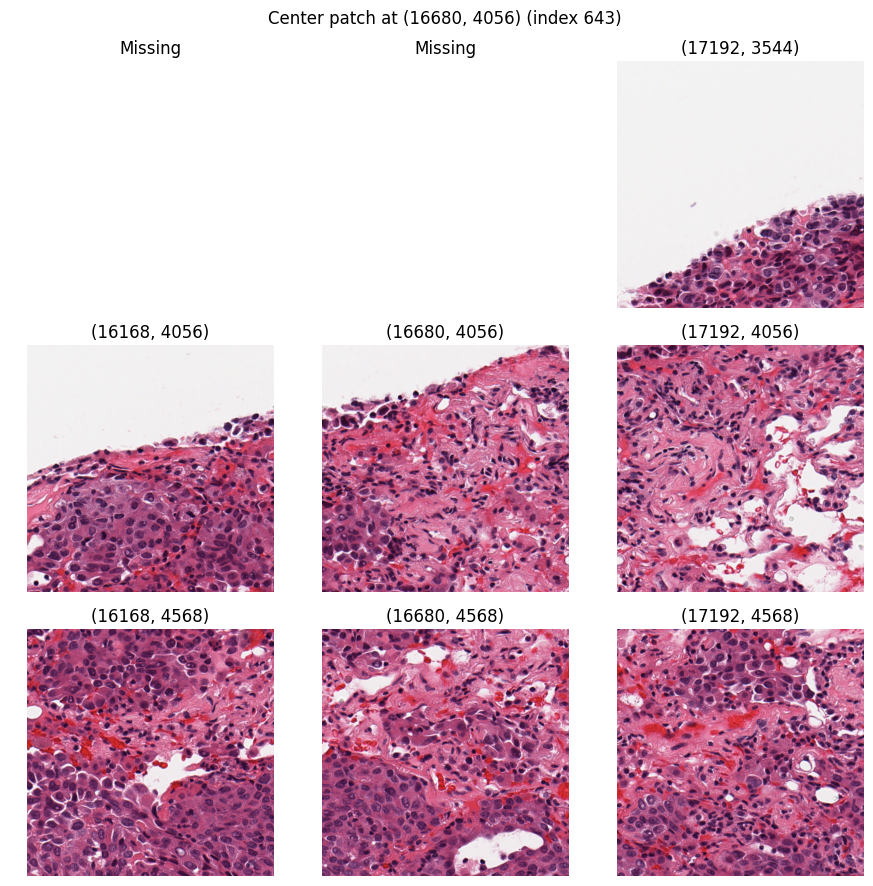


🧩 Center index: 878, coord: (20264, 7640)


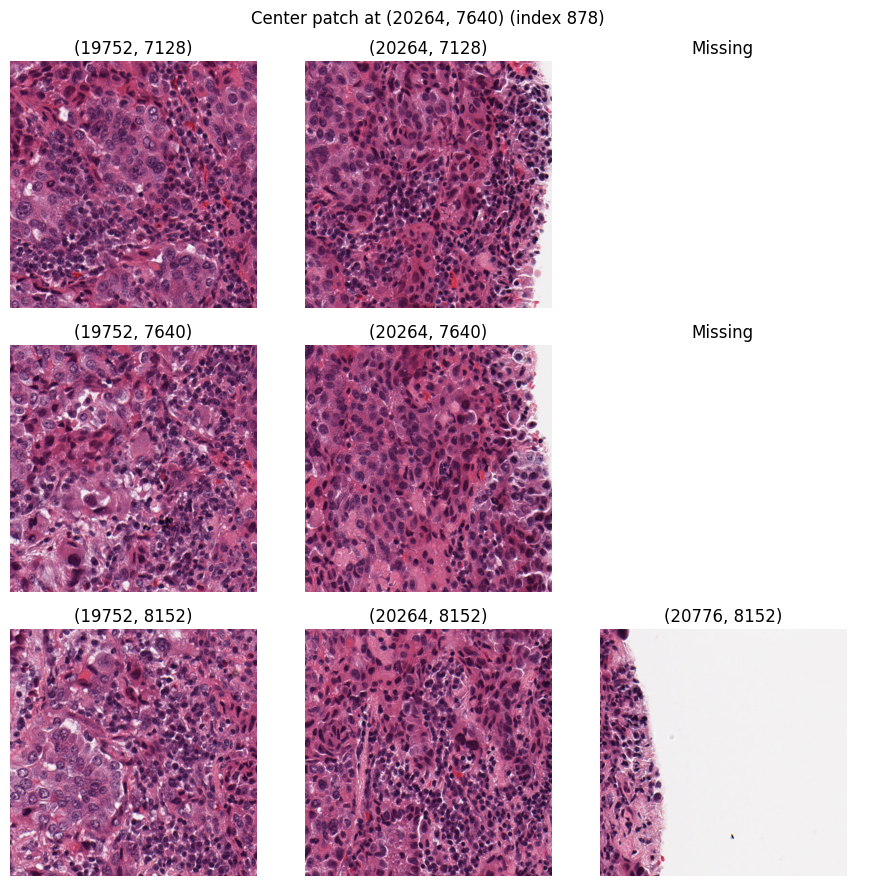


🧩 Center index: 776, coord: (18216, 19928)


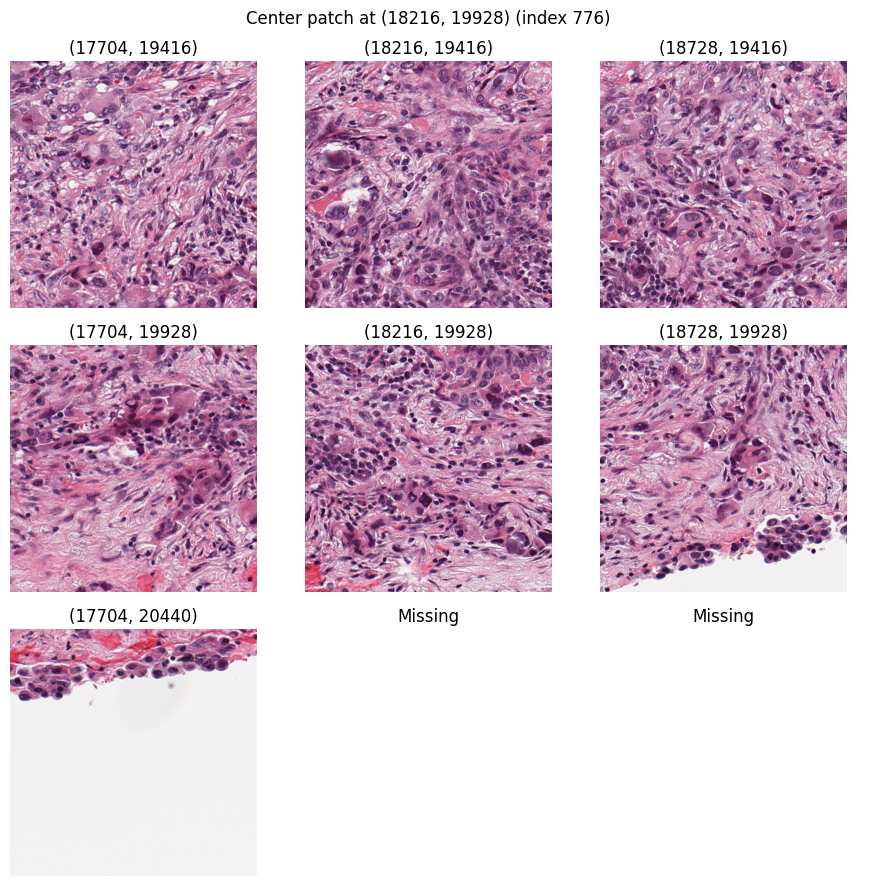

In [3]:
import h5py
import torch
import openslide    

file_name = "C3L-00001-21"

adj = torch.load(f"{SAVE_DIR}/{file_name}/adj_s_{file_name}.pt")
adj_dense = adj.cpu().to_dense().numpy()

with h5py.File(f"{FEATURE_DIR}/feats_h5/{file_name}.h5", 'r') as h5:
    coords = h5['coords'][:]
wsi = openslide.OpenSlide(f"{WSI_DIR}/{file_name}.svs")

bgg.visualize_patch_grid(
    wsi=wsi,
    coords=coords,
    adj=adj_dense,
    patch_size=512,
    neighbor_n=6
)